# Quarterly pollution levels for various cities in Maharashtra

### Importing the relevant Packages and data

First, let's import the relevant packages required for the data preparation and analysis

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

The data is in the form of an excel spreadsheet. Now, let's import the data into a pandas dataframe

In [3]:
data = pd.read_excel("assignment_sheet_jijo.xlsx")

Now, it's time to have a brief look of the data that we have. 

Let's see the shape of the dataset we have imported.

In [4]:
data.shape

(4736, 5)

It is a small dataset consisting of 4736 rows and 5 columns. Let's have a closer look and check what are these columns.

Printing the first 15 rows ->

In [5]:
data.head(n=15)

,Sampling Date,City/Town/Village/Area,SO2,NO2,RSPM/PM10
0,16-06-15,Akola,6.0,6.0,102.0
1,2015-06-07 00:00:00,Akola,5.0,6.0,103.0
2,22-06-15,Akola,6.0,5.0,103.0
3,29-06-15,Akola,6.0,6.0,103.0
4,21-09-15,Akola,6.0,7.0,104.0
5,2015-07-07 00:00:00,Akola,6.0,6.0,105.0
6,2015-07-09 00:00:00,Akola,5.0,6.0,105.0
7,30-06-15,Akola,6.0,6.0,105.0
8,2015-08-12 00:00:00,Akola,6.0,7.0,107.0
9,13-04-15,Akola,5.0,6.0,107.0


# Data Exploration and Preprocessing

Now, it's time to dig deep into the data.

## Converting dates into relevent format

Let's print the first 15 dates.

In [6]:
data['Sampling Date'].head(15)

0                16-06-15
1     2015-06-07 00:00:00
2                22-06-15
3                29-06-15
4                21-09-15
5     2015-07-07 00:00:00
6     2015-07-09 00:00:00
7                30-06-15
8     2015-08-12 00:00:00
9                13-04-15
10               21-07-15
11               23-06-15
12    2015-12-10 00:00:00
13               22-09-15
14               29-09-15
Name: Sampling Date, dtype: object

In the dataset, the dates are in either of the following 2 formats.
    1. In string format with the pattern dd-mm-yy
    2. In a timestamp format with the pattern yyyy-mm-dd hh:mm:ss
    
For the analysis, we want to extract the "quarter" (i.e, Q1,Q2,Q3,Q4) from the dates. So, let's convert the date into relevant format and extract the required information.

The following function extracts the date from the sampling date column.

In [7]:
def convert_date(text):
    tp = type(text)
    if tp == str:
        return dt.datetime.strptime(text,'%d-%m-%y')
    elif tp == dt.datetime:
        return text.date()
    else:
        return 1

Converting the date and extracting the month from the Sampling Date column =>

In [8]:
data['month'] = data['Sampling Date'].apply(lambda x : convert_date(x).month)

Now, let's extract the corresponding quarter from the month.

Q1 - April-Jun

Q2 - Jul - Sep

Q3 - Oct - Dec

Q4 - Jan - Mar

In [9]:
data['quarter'] = data['month'].apply(lambda x: 'Q'+str(int((x+2)/3) -1) )

In [10]:
data.quarter = data.quarter.replace(to_replace={'Q0':'Q4'})

Now, our dataset looks like this.

In [11]:
data[:10]

,Sampling Date,City/Town/Village/Area,SO2,NO2,RSPM/PM10,month,quarter
0,16-06-15,Akola,6.0,6.0,102.0,6,Q1
1,2015-06-07 00:00:00,Akola,5.0,6.0,103.0,6,Q1
2,22-06-15,Akola,6.0,5.0,103.0,6,Q1
3,29-06-15,Akola,6.0,6.0,103.0,6,Q1
4,21-09-15,Akola,6.0,7.0,104.0,9,Q2
5,2015-07-07 00:00:00,Akola,6.0,6.0,105.0,7,Q2
6,2015-07-09 00:00:00,Akola,5.0,6.0,105.0,7,Q2
7,30-06-15,Akola,6.0,6.0,105.0,6,Q1
8,2015-08-12 00:00:00,Akola,6.0,7.0,107.0,8,Q2
9,13-04-15,Akola,5.0,6.0,107.0,4,Q1


Let's see how many entries are there per quarter.

In [12]:
data.quarter.value_counts()

Q3    1246
Q1    1170
Q4    1166
Q2    1154
Name: quarter, dtype: int64

## Missing Values

Now, it's time to look into the missing values in the dataset. Let's see how many missing values are there in each column and if we should remove those rows or retain them by doing some imputation.

In [13]:
data.isna().sum()

Sampling Date               0
City/Town/Village/Area      0
SO2                       206
NO2                        44
RSPM/PM10                  22
month                       0
quarter                     0
dtype: int64

There are 22 missing entries in the label column, i.e, 'RSPM/PM10'. We have to remove these rows since they don't have any label that we are trying to predict.

Removing rows with empty 'RSPM/PM10' values =>

In [14]:
data = data[~data['RSPM/PM10'].isna()]

Now, let's have a closer look into the missing values in 'NO2' column.

In [15]:
data[data['NO2'].isna()]

,Sampling Date,City/Town/Village/Area,SO2,NO2,RSPM/PM10,month,quarter
374,2015-01-01 00:00:00,Aurangabad,NaN,NaN,52.0,1,Q4
407,2015-12-08 00:00:00,Aurangabad,NaN,NaN,78.0,12,Q3
547,13-07-15,Chandrapur,4.0,NaN,35.0,7,Q2
650,2015-10-02 00:00:00,Chandrapur,3.0,NaN,57.0,10,Q3
772,2015-12-02 00:00:00,Chandrapur,NaN,NaN,84.0,12,Q3
829,22-01-15,Chandrapur,NaN,NaN,103.0,1,Q4
840,28-02-15,Chandrapur,NaN,NaN,106.0,2,Q4
861,2015-12-07 00:00:00,Chandrapur,4.0,NaN,112.0,12,Q3
893,24-01-15,Chandrapur,NaN,NaN,129.0,1,Q4
905,2015-03-03 00:00:00,Chandrapur,NaN,NaN,136.0,3,Q4


As we can see above, most of the values are having empty values in both NO2 and SO2 columns. It makes sense to remove those rows as well since they are missing 2 columns out of the total 3 which we will be using fro prediction.

Removing the missing entries in NO2 column =>

In [16]:
data = data[~data['NO2'].isna()]

Now, let's have closer look at the missing values in the 'SO2' column.

In [17]:
data[data.SO2.isna()]

,Sampling Date,City/Town/Village/Area,SO2,NO2,RSPM/PM10,month,quarter
531,19-06-15,Chandrapur,NaN,19.0,26.0,6,Q1
542,20-12-15,Chandrapur,NaN,19.0,32.0,12,Q3
544,23-06-15,Chandrapur,NaN,22.0,34.0,6,Q1
546,2015-02-11 00:00:00,Chandrapur,NaN,20.0,35.0,2,Q4
548,16-06-15,Chandrapur,NaN,31.0,35.0,6,Q1
551,2015-11-06 00:00:00,Chandrapur,NaN,18.0,36.0,11,Q3
552,18-06-15,Chandrapur,NaN,22.0,36.0,6,Q1
553,24-06-15,Chandrapur,NaN,17.0,36.0,6,Q1
561,15-06-15,Chandrapur,NaN,11.0,38.0,6,Q1
563,29-11-15,Chandrapur,NaN,15.0,38.0,11,Q3


As you can see, now, data from only 'Chandrapur' area is having missing information in the SO2 column. There are 169 rows with missing entries out of 479 total entries from Chandrapur.

There are 2 approaches to solve this issue. We can either drop these 169 rows or we can impute the missing values in SO2 column with the mean of SO2 in Chandrapur for that particular quarter.

For this analysis, we are going forward with the first approach. We are dropping the missing rows.

In [18]:
data = data[~data.SO2.isna()]

In [19]:
data.shape

(4503, 7)

So, now 4503 rows are remaining from the initial dataset of 4736 rows.

## More Exploration

Let's see now many entries are there per area.

In [20]:
data['City/Town/Village/Area'].value_counts()

Nagpur         586
Nashik         470
Pune           436
Navi Mumbai    368
Chandrapur     310
Kolhapur       303
Thane          210
Nanded         209
Jalgaon        207
Sangli         205
Latur          193
Aurangabad     190
Akola          169
Amravati       164
Ulhasnagar     161
Solapur        102
Mumbai          96
Jalna           84
Lote            40
Name: City/Town/Village/Area, dtype: int64

Now, let's see how is the distribution of SO2 across all the rows. 

For this purpose, we will check the percentileof values of SO2 and we will plot the histogram of SO2.

In [21]:
data.SO2.quantile(np.arange(0,1.01,0.05))

0.00      1.0
0.05      4.0
0.10      5.0
0.15      6.0
0.20      7.0
0.25      8.0
0.30      9.0
0.35     10.0
0.40     11.0
0.45     12.0
0.50     13.0
0.55     14.0
0.60     15.0
0.65     17.0
0.70     18.0
0.75     21.0
0.80     23.0
0.85     26.0
0.90     28.0
0.95     34.0
1.00    184.0
Name: SO2, dtype: float64

(array([440., 724., 699., 895., 503., 298., 353., 273.,  86.,  90.,  89.,
         13.,  10.,   7.,   5.,   5.,   4.,   0.,   1.,   1.,   0.,   1.,
          2.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.  ,   4.66,   8.32,  11.98,  15.64,  19.3 ,  22.96,  26.62,
         30.28,  33.94,  37.6 ,  41.26,  44.92,  48.58,  52.24,  55.9 ,
         59.56,  63.22,  66.88,  70.54,  74.2 ,  77.86,  81.52,  85.18,
         88.84,  92.5 ,  96.16,  99.82, 103.48, 107.14, 110.8 , 114.46,
        118.12, 121.78, 125.44, 129.1 , 132.76, 136.42, 140.08, 143.74,
        147.4 , 151.06, 154.72, 158.38, 162.04, 165.7 , 169.36, 173.02,
        176.68, 180.34, 184.  ]),
 <a list of 50 Patch objects>)

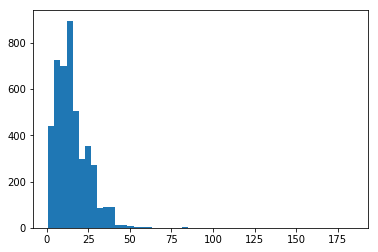

In [22]:
plt.hist(data.SO2,range=(1.0,184.0),bins=50)

As we can see from the quantiles and the histogram, there are very few rows with high SO2 values. These can be considered as outliers. Let's check how many rows are there with SO2 values higher than 100.

In [23]:
data[data.SO2>100]

,Sampling Date,City/Town/Village/Area,SO2,NO2,RSPM/PM10,month,quarter
2278,22-01-15,Nagpur,139.0,69.0,67.0,1,Q4
2446,16-03-15,Nagpur,184.0,14.0,104.0,3,Q4


Let's remove these rows from the data.

In [24]:
data = data[data.SO2 <= 100]

Similarly, let's explore NO2 by checking its percentiles and plotiing its histogram.

In [25]:
data.NO2.quantile(np.arange(0,1.01, 0.05))

0.00      2.0
0.05      9.0
0.10     12.0
0.15     14.0
0.20     17.0
0.25     21.0
0.30     23.0
0.35     25.0
0.40     27.0
0.45     29.0
0.50     31.0
0.55     33.0
0.60     36.0
0.65     38.0
0.70     41.0
0.75     44.0
0.80     48.0
0.85     53.0
0.90     59.0
0.95     67.0
1.00    167.0
Name: NO2, dtype: float64

(array([ 25., 172., 203., 414., 170., 226., 406., 402., 287., 289., 396.,
        236., 188., 230., 115., 112., 153.,  92.,  95.,  71.,  50.,  26.,
         18.,  21.,  10.,  15.,  18.,   3.,   9.,   7.,   9.,   7.,   3.,
          1.,   3.,   3.,   7.,   2.,   1.,   1.,   2.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([  2. ,   5.3,   8.6,  11.9,  15.2,  18.5,  21.8,  25.1,  28.4,
         31.7,  35. ,  38.3,  41.6,  44.9,  48.2,  51.5,  54.8,  58.1,
         61.4,  64.7,  68. ,  71.3,  74.6,  77.9,  81.2,  84.5,  87.8,
         91.1,  94.4,  97.7, 101. , 104.3, 107.6, 110.9, 114.2, 117.5,
        120.8, 124.1, 127.4, 130.7, 134. , 137.3, 140.6, 143.9, 147.2,
        150.5, 153.8, 157.1, 160.4, 163.7, 167. ]),
 <a list of 50 Patch objects>)

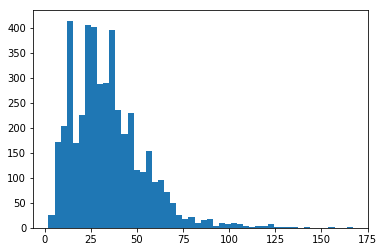

In [26]:
plt.hist(data.NO2, range=(2,167),bins=50)

As we can see, the NO2 values are more distributed than the SO2 values. Let's see how many rows are there with NO2 values greater than 135.

In [27]:
data[data.NO2>135]

,Sampling Date,City/Town/Village/Area,SO2,NO2,RSPM/PM10,month,quarter
3868,28-01-15,Pune,14.0,167.0,106.0,1,Q4
3890,28-01-15,Pune,16.0,155.0,113.0,1,Q4
3957,2015-09-12 00:00:00,Pune,25.0,137.0,137.0,9,Q2
3981,25-11-15,Pune,24.0,142.0,149.0,11,Q3


These are also outliers and we are removing them.

In [28]:
data = data[data.NO2 <= 135]

Finally, let's explore the 'RSPM/PM10' column.

In [29]:
data['RSPM/PM10'].quantile(np.arange(0,1.01,0.05))

0.00      3.0
0.05     35.0
0.10     44.0
0.15     51.0
0.20     57.0
0.25     63.0
0.30     70.0
0.35     75.0
0.40     81.0
0.45     88.0
0.50     95.0
0.55    102.0
0.60    108.0
0.65    113.0
0.70    117.0
0.75    125.0
0.80    134.0
0.85    143.0
0.90    155.0
0.95    171.2
1.00    408.0
Name: RSPM/PM10, dtype: float64

(array([ 11.,  13.,  83., 125., 199., 245., 331., 254., 314., 299., 279.,
        272., 280., 397., 268., 187., 199., 180., 126.,  96., 132.,  60.,
         28.,  21.,  17.,  14.,   8.,   8.,  11.,   4.,   9.,   5.,   2.,
          4.,   3.,   4.,   0.,   3.,   0.,   3.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([  3. ,  11.1,  19.2,  27.3,  35.4,  43.5,  51.6,  59.7,  67.8,
         75.9,  84. ,  92.1, 100.2, 108.3, 116.4, 124.5, 132.6, 140.7,
        148.8, 156.9, 165. , 173.1, 181.2, 189.3, 197.4, 205.5, 213.6,
        221.7, 229.8, 237.9, 246. , 254.1, 262.2, 270.3, 278.4, 286.5,
        294.6, 302.7, 310.8, 318.9, 327. , 335.1, 343.2, 351.3, 359.4,
        367.5, 375.6, 383.7, 391.8, 399.9, 408. ]),
 <a list of 50 Patch objects>)

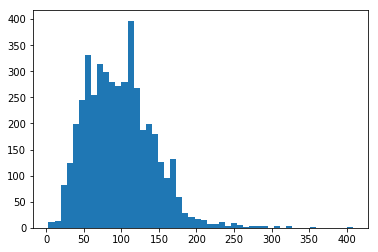

In [30]:
plt.hist(data['RSPM/PM10'],range=(3.0,408.0),bins=50)

Here, the data is more distributed. But, we can see a few outliers in the histogram. Let's see how many rows are there with 'RSPM/PM10' > 350.

In [31]:
data[data['RSPM/PM10']>350]

,Sampling Date,City/Town/Village/Area,SO2,NO2,RSPM/PM10,month,quarter
1307,22-10-15,Jalna,12.0,31.0,406.0,10,Q3
2553,2015-02-12 00:00:00,Nagpur,21.0,31.0,408.0,2,Q4
3252,2015-06-04 00:00:00,Nashik,20.0,27.0,359.0,6,Q1


Let's consider these also as outliers and remove them.

In [32]:
data = data[data['RSPM/PM10']<=350]

Now, let's see the boxplot of all three columns, i.e, NO2,SO2 and RSPM/PM10, with respect to different areas.

First, Let's see the boxplot distribution of 'RSPM/PM10' across different areas

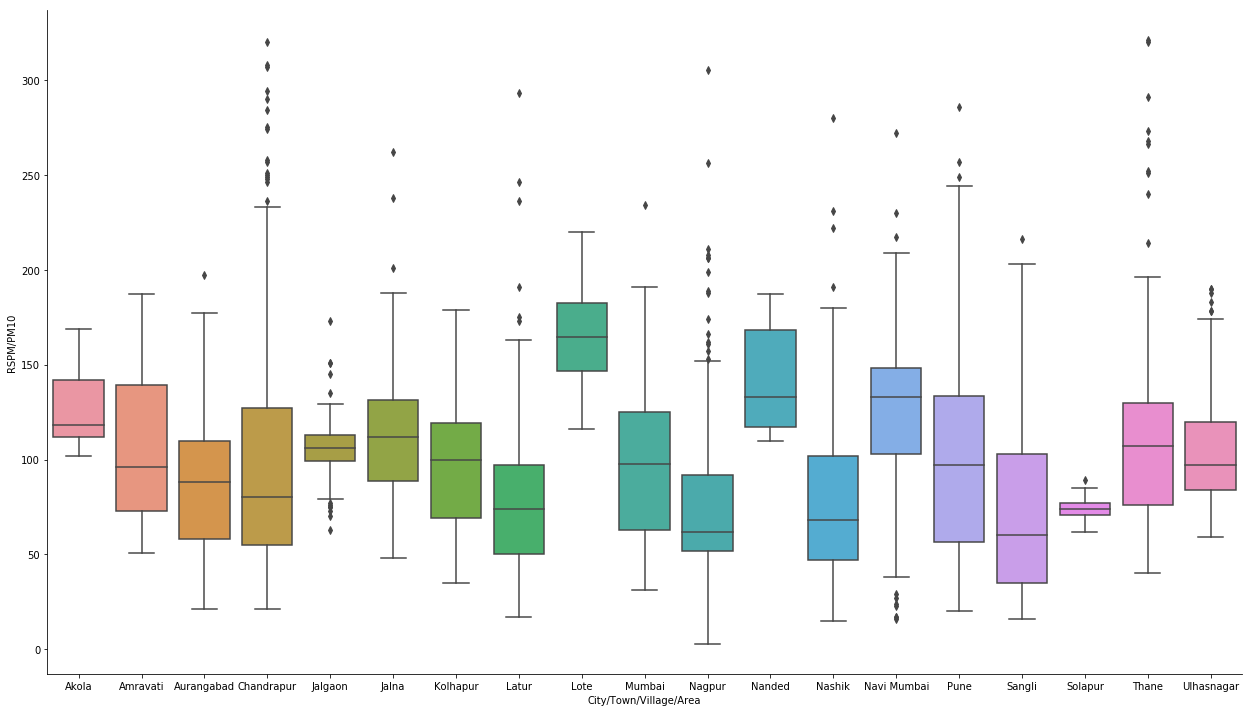

In [33]:
sns.catplot(x="City/Town/Village/Area", y = "RSPM/PM10", kind="box",data=data,height=10,aspect=1.75)

Now, let's see the boxplot distribution of NO2 across different areas.

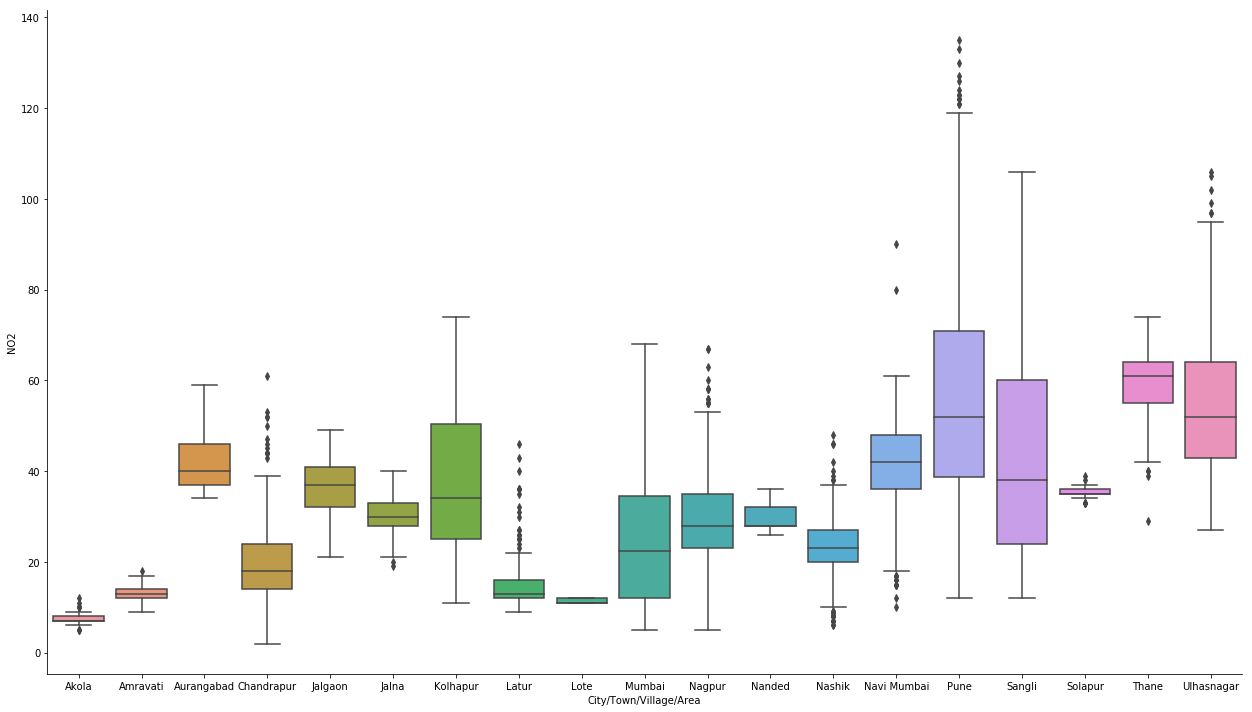

In [34]:
sns.catplot(x="City/Town/Village/Area", y = "NO2", kind="box",data=data,height=10,aspect=1.75)

Finally, let's see the boxplot distribution of 'SO2' across different areas.

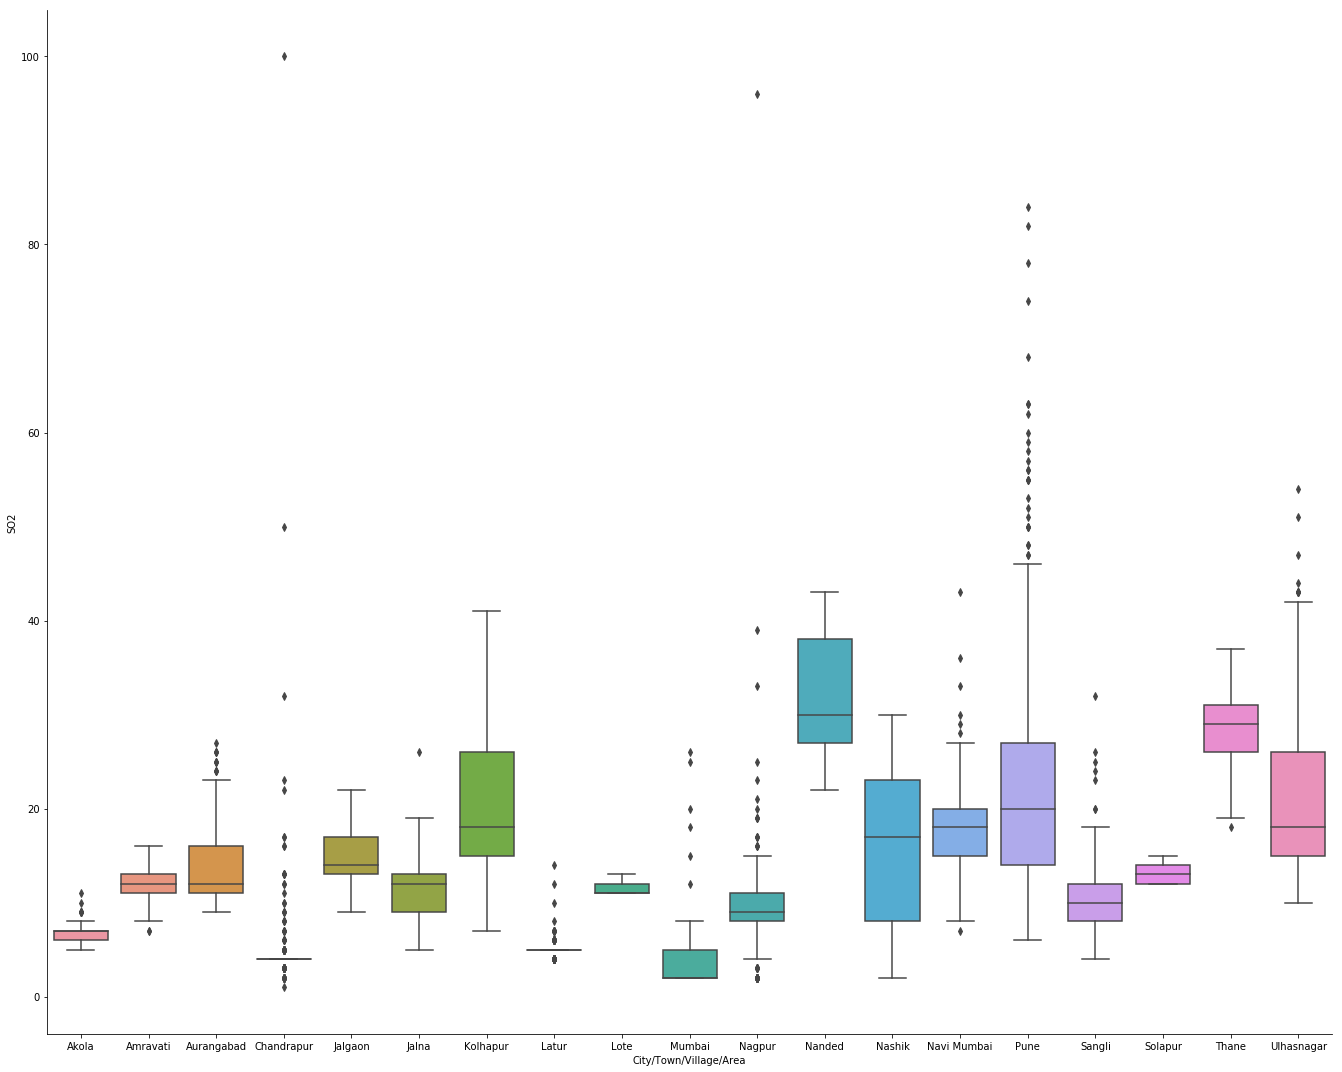

In [35]:
sns.catplot(x="City/Town/Village/Area", y = "SO2", kind="box",data=data,height=15,aspect=1.25)

# Final Data Preparation

We don't need the 'Sampling Date' and 'Month' columns as we have already extracted the required 'quarter' from them. So, we are dopping them.

In [36]:
data = data.drop(['Sampling Date','month'],axis=1)

Now, we are creating a new column for each of the 4 quarters. Each of these columns will have a 'True' value, if the corresponding row falls in that quarter. So, for each row, only one of these 4 columns will have a 'True' value and the remaininig 3 columns will be having a 'False' value.

In [37]:
for quarter in data.quarter.unique():
    data[quarter] = data.quarter == quarter
data[:10]

,City/Town/Village/Area,SO2,NO2,RSPM/PM10,quarter,Q1,Q2,Q3,Q4
0,Akola,6.0,6.0,102.0,Q1,True,False,False,False
1,Akola,5.0,6.0,103.0,Q1,True,False,False,False
2,Akola,6.0,5.0,103.0,Q1,True,False,False,False
3,Akola,6.0,6.0,103.0,Q1,True,False,False,False
4,Akola,6.0,7.0,104.0,Q2,False,True,False,False
5,Akola,6.0,6.0,105.0,Q2,False,True,False,False
6,Akola,5.0,6.0,105.0,Q2,False,True,False,False
7,Akola,6.0,6.0,105.0,Q1,True,False,False,False
8,Akola,6.0,7.0,107.0,Q2,False,True,False,False
9,Akola,5.0,6.0,107.0,Q1,True,False,False,False


Similarly,we are creating a new column for each 'City/Town/Village/Area'. Each of these columns will have a 'True' value, if the corresponding row falls in that 'City/Town/Village/Area'. So, for each row, only one of these area columns will have a 'True' value and the remaininig columns will be having a 'False' value.

In [38]:
for area in data['City/Town/Village/Area'].unique():
    data[area] = data['City/Town/Village/Area']==area
data[:10]

,City/Town/Village/Area,SO2,NO2,RSPM/PM10,quarter,Q1,Q2,Q3,Q4,Akola,Amravati,Aurangabad,Chandrapur,Jalgaon,Jalna,Kolhapur,Latur,Lote,Mumbai,Nagpur,Nanded,Nashik,Navi Mumbai,Pune,Sangli,Solapur,Thane,Ulhasnagar
0,Akola,6.0,6.0,102.0,Q1,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Akola,5.0,6.0,103.0,Q1,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Akola,6.0,5.0,103.0,Q1,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Akola,6.0,6.0,103.0,Q1,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Akola,6.0,7.0,104.0,Q2,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,Akola,6.0,6.0,105.0,Q2,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,Akola,5.0,6.0,105.0,Q2,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,Akola,6.0,6.0,105.0,Q1,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,Akola,6.0,7.0,107.0,Q2,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,Akola,5.0,6.0,107.0,Q1,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Now, we don't require the 'quarter' and 'City/Town/Village/Area' columns. So, we are dropping them.

In [39]:
data = data.drop(['City/Town/Village/Area','quarter'],axis=1)

In [40]:
data[:10]

,SO2,NO2,RSPM/PM10,Q1,Q2,Q3,Q4,Akola,Amravati,Aurangabad,Chandrapur,Jalgaon,Jalna,Kolhapur,Latur,Lote,Mumbai,Nagpur,Nanded,Nashik,Navi Mumbai,Pune,Sangli,Solapur,Thane,Ulhasnagar
0,6.0,6.0,102.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,5.0,6.0,103.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,6.0,5.0,103.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,6.0,6.0,103.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,6.0,7.0,104.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,6.0,6.0,105.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,5.0,6.0,105.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,6.0,6.0,105.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,6.0,7.0,107.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,5.0,6.0,107.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Now, we are reindexing the columns and placing the column that we are going to predict('RSPM/PM10') in the last.

In [41]:
cols = ['SO2', 'NO2', 'Q1', 'Q2', 'Q3', 'Q4', 'Akola', 'Amravati',
       'Aurangabad', 'Chandrapur', 'Jalgaon', 'Jalna', 'Kolhapur', 'Latur',
       'Lote', 'Mumbai', 'Nagpur', 'Nanded', 'Nashik', 'Navi Mumbai', 'Pune',
       'Sangli', 'Solapur', 'Thane', 'Ulhasnagar','RSPM/PM10']

In [42]:
data = data.reindex(columns=cols)

In [43]:
data[:10]

,SO2,NO2,Q1,Q2,Q3,Q4,Akola,Amravati,Aurangabad,Chandrapur,Jalgaon,Jalna,Kolhapur,Latur,Lote,Mumbai,Nagpur,Nanded,Nashik,Navi Mumbai,Pune,Sangli,Solapur,Thane,Ulhasnagar,RSPM/PM10
0,6.0,6.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,102.0
1,5.0,6.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,103.0
2,6.0,5.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,103.0
3,6.0,6.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,103.0
4,6.0,7.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,104.0
5,6.0,6.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,105.0
6,5.0,6.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,105.0
7,6.0,6.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,105.0
8,6.0,7.0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,107.0
9,5.0,6.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,107.0


Let's check the size of the dataset now.

In [44]:
data.shape

(4494, 26)

Before proceeding, let's check the correlation between 'SO2' and 'NO2' columns in the data and see if they are very high (say, greater than 0.85)

In [45]:
data.iloc[:,:2].corr(method='pearson')

,SO2,NO2
SO2,1.000000,0.572123
NO2,0.572123,1.000000


Now, let's proceed to the modelling part.

# Modelling

Let's import the relevant packages required for creation of the predictive model.

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

Now, let's split the dataset into training and testing sets.

In [47]:
train,test = train_test_split(data)

In [48]:
rf1 = RandomForestRegressor(n_estimators=50)

In [49]:
rf2 = RandomForestRegressor(n_estimators=70,min_samples_leaf=3,max_features=0.5)

In [50]:
lr1 = LinearRegression()

In [51]:
gbm1 = GradientBoostingRegressor()

In [52]:
rf1.fit(train.iloc[:,:25],train.iloc[:,25])

rf2.fit(train.iloc[:,:25],train.iloc[:,25])

lr1.fit(train.iloc[:,:25],train.iloc[:,25])

gbm1.fit(train.iloc[:,:25],train.iloc[:,25])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [53]:
pred_train_rf1 = rf1.predict(train.iloc[:,:25])

pred_train_rf2 = rf2.predict(train.iloc[:,:25])

pred_train_lr1 = lr1.predict(train.iloc[:,:25])

pred_train_gbm1 = gbm1.predict(train.iloc[:,:25])

pred_train = (pred_train_rf1+pred_train_rf2+pred_train_lr1+pred_train_gbm1)/4

In [54]:
print("Training Set Root Mean Squared Error = " + str(np.sqrt(mean_squared_error(pred_train,train.iloc[:,25]))))
print("Training Set Mean Absolute Error = " + str(mean_absolute_error(pred_train,train.iloc[:,25])))

Training Set Root Mean Squared Error = 27.249084286947067
Training Set Mean Absolute Error = 18.98481145851497


In [55]:
pred_test_rf1 = rf1.predict(test.iloc[:,:25])

pred_test_rf2 = rf2.predict(test.iloc[:,:25])

pred_test_lr1 = lr1.predict(test.iloc[:,:25])

pred_test_gbm1 = gbm1.predict(test.iloc[:,:25])

pred_test = (pred_test_rf1+pred_test_rf2+pred_test_lr1+pred_test_gbm1)/4

In [56]:
print("Testing Set Root Mean Squared Error = " + str(np.sqrt(mean_squared_error(pred_test,test.iloc[:,25]))))
print("Testing Set Mean Absolute Error = " + str(mean_absolute_error(pred_test,test.iloc[:,25])))

Testing Set Root Mean Squared Error = 33.00397259195004
Testing Set Mean Absolute Error = 22.810211302593938


## Prediction of new data

#### Converting new data into relevant pandas format

Let the new data in the form of tuple be tup_data. The tuple is of the form <Quarter, Place, SO2, NO2> . Before feeding to the model, we will process it and convert into a dataframe in the relevant format.

In [57]:
tup_data = ('Q1','Nagpur',56,43)

In [58]:
new_data = pd.DataFrame(columns=cols)

Converting into releant pandas dataframe.

In [59]:
new_data.loc[0,'SO2'] = tup_data[2]
new_data.loc[0,'NO2'] = tup_data[3]
for col_name in new_data.columns:
    for element in tup_data:
        if col_name==element:
            new_data.loc[0,col_name]= True
new_data[new_data.isnull()] = False

In [60]:
new_data

,SO2,NO2,Q1,Q2,Q3,Q4,Akola,Amravati,Aurangabad,Chandrapur,Jalgaon,Jalna,Kolhapur,Latur,Lote,Mumbai,Nagpur,Nanded,Nashik,Navi Mumbai,Pune,Sangli,Solapur,Thane,Ulhasnagar,RSPM/PM10
0,56,43,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


#### Prediction from new data

In [61]:
pred_new_rf1 = rf1.predict(new_data.iloc[:,:25])
pred_new_rf2 = rf2.predict(new_data.iloc[:,:25])
pred_new_lr1 = lr1.predict(new_data.iloc[:,:25])
pred_new_gbm1 = gbm1.predict(new_data.iloc[:,:25])
pred_new = (pred_new_rf1+pred_new_rf2 + pred_new_lr1 +pred_new_gbm1)/4

In [62]:
print("Final 'RSPM/PM10' Prediction for the input tuple = " + str(pred_new))

Final 'RSPM/PM10' Prediction for the input tuple = [142.185626]
